In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.duplicated().sum()

np.int64(0)

#### Cabin has too many missing values. Embarked and Age have less missing values so can be imputed. Name, Sex, Ticket, Cabin, and Embarked have categorical data. No duplicate values found

In [12]:
# No. of unique data in each feature
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### PassengerId, Name, Ticket have too many unique values
#### So we drop features -> PassengerId, Name, Ticket, and Cabin

In [13]:
df.drop(columns = ['PassengerId','Name','Ticket','Cabin'], inplace =  True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Outlier

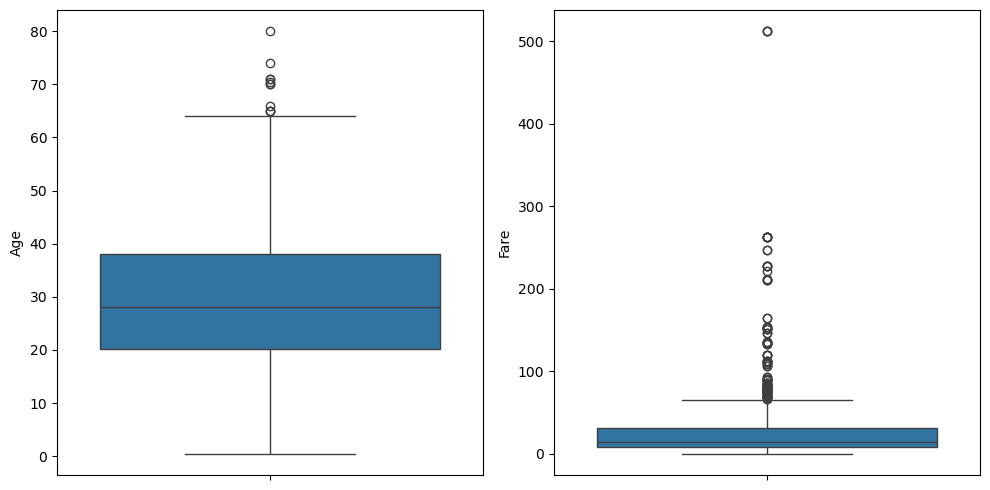

In [38]:
fig,axes = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(data = df['Age'],ax = axes[0])
sns.boxplot(data = df['Fare'],ax = axes[1])
plt.tight_layout()
plt.show()

#### Outliers are present in both Age and Fare 

In [52]:
# Outlier removal for Age feature using IQR method

q1,q3 = df['Age'].quantile([0.25,0.75])
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

df['Age'] = np.where(df['Age'] < lower_limit, lower_limit,
                     np.where(df['Age'] > upper_limit, upper_limit, df['Age']
                             )
                    )

In [53]:
# Outlier removal for Fare feature using IQR method

q1,q3 = df['Fare'].quantile([0.25,0.75])
IQR = q3 - q1
upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR

df['Fare'] = np.where(df['Fare'] < lower_limit, lower_limit,
                     np.where(df['Fare'] > upper_limit, upper_limit, df['Fare']
                             )
                    )

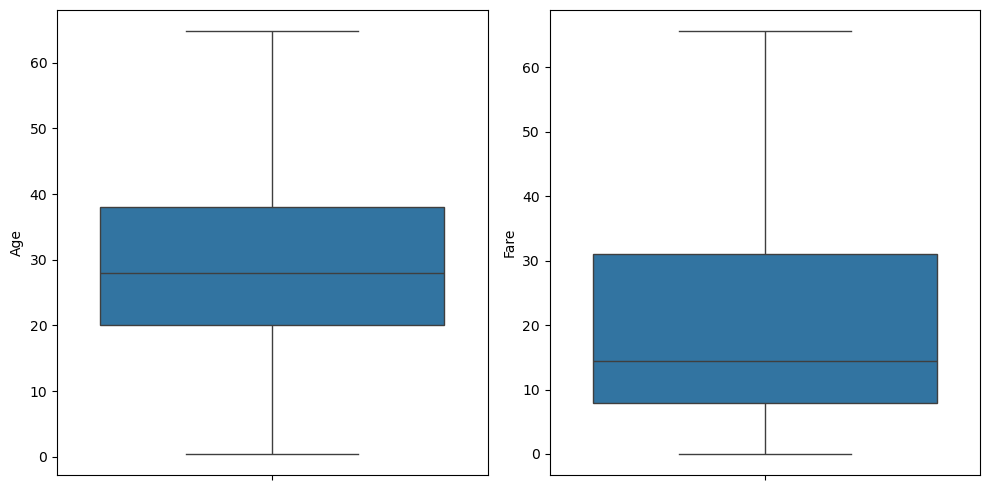

In [54]:
fig,axes = plt.subplots(1,2,figsize = (10,5))
sns.boxplot(data = df['Age'],ax = axes[0])
sns.boxplot(data = df['Fare'],ax = axes[1])
plt.tight_layout()
plt.show()

### Handling missing values

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [129]:
ct_impute = ColumnTransformer(remainder = 'passthrough', 
                  transformers = [
                      ('age_impute',SimpleImputer(strategy = 'mean'),['Age']),
                      ('embarked_impute',SimpleImputer(strategy = 'most_frequent'),['Embarked'])
                  ]
                 )

ct_encode = ColumnTransformer(remainder = 'passthrough',
                              transformers = [
                                  ('encoding',OneHotEncoder(drop = 'first',sparse_output = False,handle_unknown = 'ignore'),[1,4])
                              ]
                             )

In [130]:
df_impute = ct_impute.fit_transform(df)
df_encode = ct_encode.fit_transform(df_impute)
df_encode

array([[0.0, 1.0, 1.0, ..., 1, 0, 7.25],
       [0.0, 0.0, 0.0, ..., 1, 0, 65.6344],
       [0.0, 1.0, 0.0, ..., 0, 0, 7.925],
       ...,
       [0.0, 1.0, 0.0, ..., 1, 2, 23.45],
       [0.0, 0.0, 1.0, ..., 0, 0, 30.0],
       [1.0, 0.0, 1.0, ..., 0, 0, 7.75]], dtype=object)

In [131]:
pd.DataFrame(df_encode).head()

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,1.0,22.0,0,3,1,0,7.25
1,0.0,0.0,0.0,38.0,1,1,1,0,65.6344
2,0.0,1.0,0.0,26.0,1,3,0,0,7.925
3,0.0,1.0,0.0,35.0,1,1,1,0,53.1
4,0.0,1.0,1.0,35.0,0,3,0,0,8.05


# Standardization

In [138]:
from sklearn.preprocessing import StandardScaler

In [135]:
std = StandardScaler()
df_std = std.fit_transform(df_encode)

In [137]:
df_std

array([[-0.30756234,  0.61583843,  0.73769513, ...,  0.43279337,
        -0.47367361, -0.82055245],
       [-0.30756234, -1.62380254, -1.35557354, ...,  0.43279337,
        -0.47367361,  2.03162322],
       [-0.30756234,  0.61583843, -1.35557354, ..., -0.4745452 ,
        -0.47367361, -0.78757757],
       ...,
       [-0.30756234,  0.61583843, -1.35557354, ...,  0.43279337,
         2.00893337, -0.02915533],
       [-0.30756234, -1.62380254,  0.73769513, ..., -0.4745452 ,
        -0.47367361,  0.29082313],
       [ 3.25137334, -1.62380254,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.79612661]])